Name: Farros Alferro


Student ID: C0TB1706 


Supervisor:  Assoc. Prof. Shingo Kagami

# Objective

Robotics, like many other creative technical sectors today, has been and continues to be affected in various ways by machine learning technologies. Robot arms, for example, are a versatile device utilized in a variety of sectors. In this experiment, we use a single-finger robot to throw a ball and then study its behavior.


Nonetheless, predicting the ball's behavior is challenging because it is significantly influenced by various elements, including the robot's motion, ball property, the elasticity of the robot, and air resistance (in this experiment, we only consider the first factor and omit the rest). As a result, we apply AI methods, particularly regression and optimization, to regulate the movement of the balls. Thus, the goal of these experiments is to learn how to employ AI technology in the context of robot control.

# Methods and Theory

## Regression with MLP

Regression is a technique for determining the relationship between independent variables or features ($x_1, x_2, ..., x_k$) and a dependent variable or outcome ($y$). Once the relationship between the independent and dependent variables has been estimated, outcomes can be predicted. It's used in predictive modeling to predict continuous outcomes, therefore it's useful for forecasting and predicting data outputs. In general, machine learning regression entails sketching a line of greatest fit through the data points.

$$\begin{aligned}
y &= F(x)
\end{aligned}$$
 
This model is then trained so that the errors between each point and the line is minimized.

Model F has a variety of designs. A linear model is the most basic. However, the capability of linear models is restricted; when modeling nonlinear functions, the modeling error becomes considerable. We can overcome the limitations of linear models by incorporating one or more hidden layers. The easiest way to do this is to stack many fully connected layers on top of each other. Each layer feeds into the layer above it, until we generate outputs. We can think of the first L−1 layers as our representation and the final layer as our linear predictor. This architecture is commonly called a multilayer perceptron, often abbreviated as MLP. We wil utilized MLP in this experiment [<a href='http://www.ic.is.tohoku.ac.jp/~swk/lecture/exp2/'>1</a>].


<center><img  src="https://d2l.ai/_images/mlp.svg"></center>


This MLP has 4 inputs, 3 outputs, and its hidden layer contains 5 hidden units. Since the input layer does not involve any calculations, producing outputs with this network requires implementing the computations for both the hidden and output layers; thus, the number of layers in this MLP is 2. Note that both layers are fully connected. Every input influences every neuron in the hidden layer, and each of these in turn influences every neuron in the output layer.

Let us denote by the matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$ a minibatch of $n$ examples where each example has $d$ inputs (features). For a one-hidden-layer MLP whose hidden layer has $h$ hidden units, we denote by $\mathbf{H} \in \mathbb{R}^{n \times h}$ the outputs of the hidden layer, which are *hidden representations*. Since the hidden and output layers are both fully connected, we have hidden-layer weights $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ and biases $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$ and output-layer weights $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$ and biases $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$. This allows us to calculate the outputs $\mathbf{O} \in \mathbb{R}^{n \times q}$ of the one-hidden-layer MLP as follows:

$$
\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}
$$

Note that after adding the hidden layer, our model now requires us to track and update additional sets of parameters. However, the model does not gain anything even with additional hidden layer. The reason is because the hidden units above are given by an affine function of the inputs, and the outputs (pre-softmax) are just an affine function of the hidden units. An affine function of an affine function is itself an affine function. Moreover, our linear model was already capable of representing any affine function.

To see this formally we can just collapse out the hidden layer in the above definition, yielding an equivalent single-layer model with parameters
$\mathbf{W} = \mathbf{W}^{(1)}\mathbf{W}^{(2)}$ and $\mathbf{b} = \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$:

$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$

In order to realize the potential of multilayer architectures, we need one more key ingredient: a nonlinear *activation function* $\sigma$ to be applied to each hidden unit following the affine transformation. For instance, a popular choice is the ReLU (Rectified Linear Unit) activation function $\sigma(x) = \mathrm{max}(0, x)$ operating on its arguments element-wise. The outputs of activation functions $\sigma(\cdot)$ are called *activations*. In general, with activation functions in place, it is no longer possible to collapse our MLP into a linear model:

$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

Since each row in $\mathbf{X}$ corresponds to an example in the minibatch, with some abuse of notation, we define the nonlinearity $\sigma$ to apply to its inputs in a row-wise fashion, i.e., one example at a time. Note that we used the same notation for softmax when we denoted a row-wise operation in. Quite frequently the activation functions we use apply not merely row-wise but  element-wise. That means that after computing the linear portion of the layer, we can calculate each activation without looking at the values taken by the other hidden units.

To build more general MLPs, we can continue stacking such hidden layers, e.g., $\mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$ and $\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$, one atop another, yielding ever more expressive models [<a href='https://d2l.ai/chapter_multilayer-perceptrons/mlp.html'>2</a>].

## Optimization with CMA-ES
Function optimization is the challenge of determining the set of inputs to an objective goal function that results in maximum or minimum output of the function. The objective function must be minimized or maximized because it describes the difference between the actual value of the estimated parameter and what the model predicted. It can be a difficult task because the function has tens, hundreds, thousands, or even millions of inputs, and the structure of the function is unknown and frequently non-differentiable and noisy. Instead of solving it analytically, we can use numerical optimization in this case.

Hill climbing is a simple example of an optimization algorithm. We begin with a random (or predetermined) initial value of $x_0$ and compute the gradient of the objective function, $E(x)$, with respect to $x$ about $x_0$.

$$
\begin{aligned}
    \frac{dE}{dx}(x_0)
\end{aligned}
$$

When $x_0$ is changed to the gradient's negative direction, the value of the evaluation function at the modified $x$ decreases. We will eventually identify $x$ that minimizes $E$ by iterating these modifications.

Other approaches that use gradients include the gradient descent method and Newton's method. MLP is trained via back-propagation, which is also a gradient approach. One disadvantage of the gradient approach is that it is frequently trapped by local optima. Consider the case where $E$ has many peak positions. This problem can occur when $E$ employs learning models such as MLP.

We will employ CMA-ES (Covariance Matrix Adaptation Evolution Strategy) in this experiment, which is another strategy that does not require us to provide the gradient of. It employs a population of search points, making it more resistant to noisy functions than gradient approaches. CMA-ES is an evolutionary algorithm, which is based on the principle of biological evolution, namely the repeated interplay of variation (via recombination and mutation) and selection: in each generation (iteration), new individuals (candidate solutions, $x$) are generated by variation of the current parental individuals, usually in a stochastic way. Then, based on their fitness or objective function value $E$, some individuals are chosen to be parents in the next generation. Like this, over the generation sequence, individuals with better and better $E$-values are generated [<a href='https://doi.org/10.48550/arXiv.1604.00772'>3</a>][<a href='https://en.wikipedia.org/wiki/CMA-ES'>4</a>].

The CMA-ES algorithm employs two fundamental ideas for the adaptation of search distribution parameters:

1. A maximum-likelihood principle that seeks to increase the likelihood of successful candidate solutions and search processes. The distribution's mean is adjusted to optimize the likelihood of previously successful candidate solutions. The distribution's covariance matrix is changed (incrementally) to boost the likelihood of previously successful search steps. Both updates are examples of natural gradient descent. As a result, the CMA performs an iterated principal components analysis of successful search steps while keeping all primary axes intact. The Cross-Entropy Method and distribution algorithm estimation are based on very similar ideas, but they estimate the covariance matrix (non-incrementally) by maximizing the likelihood of successful solution points rather than successful search steps.

2. Two pathways of the time evolution of the strategy's distribution mean are recorded, which are referred to as search or evolution paths. These pathways offer important information about the relationship between successive steps. Specifically, if successive steps in the same direction are done, the evolution routes become long. Two methods are used to exploit the evolution routes. In place of single successful search steps, one path is used for the covariance matrix adaptation technique, allowing for a potentially much faster variance rise of favorable directions. The other path is utilized to do another step-size control. The goal of this step-size control is to make sequential distribution mean movements orthogonal in expectation. The step-size adjustment efficiently prevents premature convergence while still allowing for quick convergence to an optimum.

## Model-based Reinforcement Learning for Throwing Motion

Assume a control parameter $x$ that alters the flight distance of the robot's thrown ball. $x$, for example, is the torque parameter. Let $y$ be the flight distance. Let $f$ represent the dynamics (the analytical model), thus $y = f(x)$. The ball throwing issue is one in which we must discover a control parameter $x_{opt}$ that achieves $y_{trg} \approx f(x_{opt})$ for a given target of flying distance $y_{trg}$. It is important to note that we must solve this problem for any $y_{trg}$ [<a href='http://www.ic.is.tohoku.ac.jp/~swk/lecture/exp2/'>1</a>].

The following is the proposed solution::

1. Training Phase:

    1.1. Throwing the ball using random control parameters ($x$) and measuring the distances it travels ($y$). We obtain $\left\{x, y | k = 1,2,...,N\right\}$. Here, we can choose one of three available parameters: torque, initial angle, and target angle. 

    1.2. Using the data obtained above, we train an MLP model.

2. The concept of optimizing the control parameter is as follows: we define the objective function as the squared error of $y_{trg}$ and $f(x)$:

$$\begin{aligned}
    f_{error}(x) = (y_{trg} - f(x))^2
\end{aligned}$$

Then, using CMA-ES, we minimize this objective function in relation to $x$. The obtained $x$ is $x_{opt}$, which fulfills $y_{trg} \approx f(x_{opt})$.

# Experiments and Results
We employ a robot simulator that is similar to the real-life single-finger robot. It is built with the Unity game engine and replicates the physics of a robot and a ball. The following link will lead us to the robot arm:

http://akihikoy.net/p/FingerRobotWebGL/index.html

<center><img alt="_images/FingerRobotWebGL.png" src="http://www.ic.is.tohoku.ac.jp/~swk/lecture/exp2/_images/FingerRobotWebGL.png"></center>

There is a text box and the Run button visible in the bottom left corner. The text box contains a list of commands for controlling the robot. To run the commands, press the Run button. By default, it goes to 30 degrees, waits 2 seconds, and then moves to 100 degrees with 200 power. The robot will throw the ball, and the ball will land on the ground after a few seconds. The position of the ball is always indicated in the upper left corner. When the ball lands, the "First landing location" is presented, which indicates the ball's flying distance.

## Environment Setup
The experiment results were calculated and evaluated using Google Colaboratory or Jupyter Notebook to make it clearer as we can write code and text. Once a notebook is created, we first clone the library that contains functions necessary to process the experiment results to our local directory. In addition, we also import the **numpy** [<a href='https://numpy.org/doc/stable/'>5</a>] library to make array-based calculations easier and the **tabulate** [<a href='https://pypi.org/project/tabulate/'>6</a>] library to make table-like output in this notebook. 

In [1]:
!git clone https://github.com/akihikoy/ai_ctrl_1.git

import sys
sys.path.append('ai_ctrl_1/sample')
from libaictrl2 import *
import numpy as np
from tabulate import tabulate


fatal: destination path 'ai_ctrl_1' already exists and is not an empty directory.


## Regression with MLP
In this exercise, we create synthetic data and use it to train the MLP model. To do this, we use a function from numpy.random module to generate an array that consists of 30 random samples from a uniform distribution over [0, 1). 

In [2]:
# Create artificial samples
np.random.seed(1234)
data_x = np.sort(np.random.rand(30))
print(f'data x: {data_x}')

data x: [0.01376845 0.07538124 0.19151945 0.27259261 0.27646426 0.31683612
 0.35781727 0.36488598 0.36882401 0.37025075 0.39720258 0.43772774
 0.50099513 0.50308317 0.56119619 0.56809865 0.61539618 0.62210877
 0.65137814 0.68346294 0.71270203 0.77282662 0.77997581 0.78535858
 0.78873014 0.80187218 0.87593263 0.88264119 0.9331401  0.95813935]


After that, we create two functions: a linear function and a parabolic function. Moreover, we also added some constants in order to make the data more visible when it is plotted. Then we input the $x$ data to each function to generate $y$ values with their corresponding behaviour (linear and nonlinear). 

In [3]:
# Generate the y value for both linear and nonlinear functions
def linear_fc(x):
    return x + 0.05

def second_order_fc(x):
    return 4 * (x - 0.5) ** 2 + 0.05

data_y = linear_fc(data_x)
data_y_nonlinear = second_order_fc(data_x)
print(f'linear y: {data_y}\n')
print(f'nonlinear y: {data_y_nonlinear}')

linear y: [0.06376845 0.12538124 0.24151945 0.32259261 0.32646426 0.36683612
 0.40781727 0.41488598 0.41882401 0.42025075 0.44720258 0.48772774
 0.55099513 0.55308317 0.61119619 0.61809865 0.66539618 0.67210877
 0.70137814 0.73346294 0.76270203 0.82282662 0.82997581 0.83535858
 0.83873014 0.85187218 0.92593263 0.93264119 0.9831401  1.00813935]

nonlinear y: [0.99568448 0.77120436 0.430641   0.25685649 0.24987292 0.18419602
 0.13086371 0.12302319 0.11882857 0.11733947 0.09226924 0.06551134
 0.05000396 0.05003802 0.06497989 0.06854971 0.10326511 0.10964221
 0.14166137 0.18463459 0.23096861 0.34773746 0.36354581 0.37571809
 0.38346038 0.41450725 0.61530138 0.63565712 0.80044139 0.88956667]


Then, we train the MLP model for each case and test the model for one sample $x=0.75$.

In [4]:
# Train the MLP model
f = TrainMLPR(data_x, data_y)
f_nonlinear = TrainMLPR(data_x, data_y_nonlinear)
print(f'linear data: f(0.75) = {f(0.75)}')
print(f'nonlinear data: f(0.75) = {f_nonlinear(0.75)}')

linear data: f(0.75) = 0.8020389724749504
nonlinear data: f(0.75) = 0.3055841752437347


Lastly, we plot the model's predicted value for both the linear and nonlinear data. As seen from the figure below, the MLP model can predict the function of the generated data: linear function for the gray-colored samples and 2<sup>th</sup> polynomial function for the tan-colored samples. This shows that the MLP model is able to approximate nonlinear data, a feature that cannot be found in linear regression model.

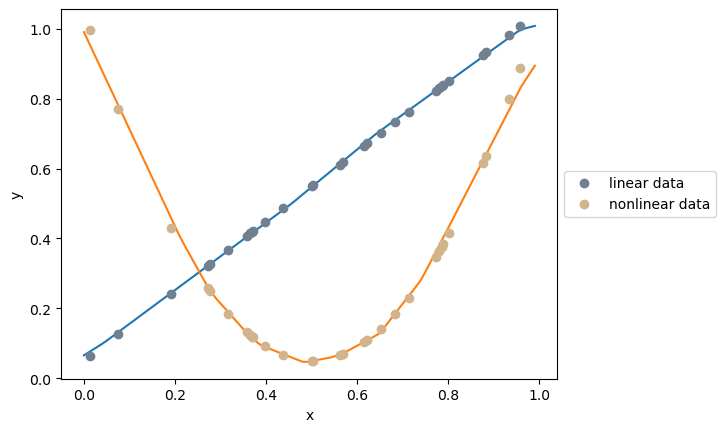

In [5]:
# Line plot the output of the model 
plot = PlotF(f, xmin=0.0, xmax=1.0, show=False)
plot_nonlinear = PlotF(f_nonlinear, xmin=0.0, xmax=1.0, show=False)

# Scatter plot the data samples
plot.plot(data_x, data_y, 'o', c='slategray', label='linear data')
plot.plot(data_x, data_y_nonlinear, 'o', c='tan', label='nonlinear data')

# Show the labels, legends, and the figure
plot.xlabel('x')
plot.ylabel('y')
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot.show()

## Optimization with CMA-ES

In this exercise, we are going to find an $x$ point on the previous plot with the nearest value to the target value $y_{trg}$. To do this, first, we define an objective function of each case, which is the squared error of $y_{trg}$ and $f(x)$ learned in the previous section.

In [6]:
# Define the objective function
def f_error(x):
  y_trg = 0.75
  return (y_trg - f(x))**2

def f_error_nonlinear(x):
  y_trg = 0.75
  return (y_trg - f_nonlinear(x))**2

Next, we optimize the objective function by inputting init to the *Fmin* function, which is an optimizer function that utilizes the CMA-ES algorithm and return the $x$ value that optimizes the input function. In the below code, we use $x=0.5$ as the initial value with a search range between $0.0$ and $1.0$.

In [7]:
# Finding x that minimizes the objective function
x_opt = FMin(f_error, 0.5, 0.0, 1.0)
x_opt_nonlinear = FMin(f_error_nonlinear, 0.5, 0.0, 1.0)

initial solution x0= [0.5]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 1 (seed=206750, Mon May 15 10:40:12 2023)
Iterat #Fevals   function value    axis ratio  sigma  minstd maxstd min:sec
    1       4 4.157532605086295e-03 1.0e+00 3.90e-01  3e-01  3e-01 0:0.0
    2       8 4.939371197393421e-05 1.0e+00 2.60e-01  2e-01  2e-01 0:0.0
    3      12 2.965127461249824e-03 1.0e+00 2.21e-01  1e-01  1e-01 0:0.1
   49     196 4.278268851574479e-16 1.0e+00 1.10e-05  5e-08  5e-08 0:0.2
termination on tolfun=1e-11 (Mon May 15 10:40:12 2023)
final/bestever f-value = 5.380158e-16 2.575412e-17
mean solution: [0.69479721]
std deviation: [5.03060427e-08]
initial solution x0= [0.5]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 1 (seed=281549, Mon May 15 10:40:12 2023)
Iterat #Fevals   function value    axis ratio  sigma  minstd maxstd min:sec
    1       4 2.456704139623830e-06 1.0e+00 5.54e-01  5e-01  5e-01 0:0.0
    2       8 2.070717314538628e-05 1.0e+00 5.86e-01  5e-01  5e-01 0:0.0


We can observe from the upper code output that the *Fmin* function is able to obtain the $x_{opt}$ value after $44$ and $50$ iterations for both linear and nonlinear cases, respectively. To test this, we input back the obtained value to the MLP model, and as shown below, the *Fmin* does a great job of acquiring the $x$ value that optimizes the previous objective function. Moreover, we also add the coordinate $(x_{opt}, \ f_{error}(x_{opt}))$ to the previous plot, indicated by the 'x' symbol for the linear function and '*' for the nonlinear function.

In [8]:
# Print the result
print('Linear solution:', x_opt, f(x_opt), f_error(x_opt))
print('Nonlinear solution:', x_opt_nonlinear, f_nonlinear(x_opt_nonlinear), f_error_nonlinear(x_opt_nonlinear))

Linear solution: 0.694797184746893 0.7499999949251479 2.5754123777105775e-17
Nonlinear solution: 0.08664843500343225 0.7500000026295102 6.914323708701365e-18


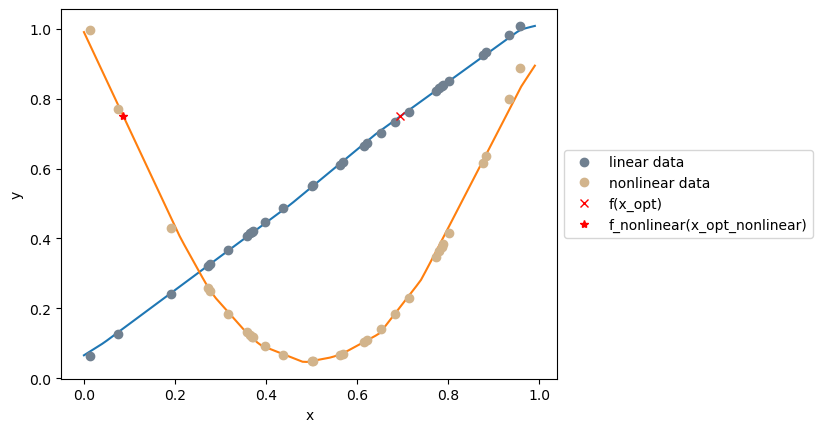

In [9]:
# Line plot the output of the model 
plot = PlotF(f, xmin=0.0, xmax=1.0, show=False)
plot_nonlinear = PlotF(f_nonlinear, xmin=0.0, xmax=1.0, show=False)

# Scatter plot the data samples
plot.plot(data_x, data_y, 'o', c='slategray', label='linear data')
plot.plot(data_x, data_y_nonlinear, 'o', c='tan', label='nonlinear data')

# Plot x_opt 
plot.plot([x_opt], [f(x_opt)], 'x', c='red', label='f(x_opt)')
plot.plot([x_opt_nonlinear], [f_nonlinear(x_opt_nonlinear)], '*', c='red', label='f_nonlinear(x_opt_nonlinear)')

# Show the labels, legends, and the figure
plot.xlabel('x')
plot.ylabel('y')
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot.show()

## Learning Dynamics of Throwing Robot

Data that will be used to train the MLP model is obtained by manually inputting the independent variable $x$ and assigning the first landing position as the dependent variable $y$. As we use a robot simulator, commands are needed to move the robot with the desired parameters. Here are the commands used to obtain the data:

```
Reset
MoveToTrg, 20
Wait, 2
MoveToTrg, 110, 100
Wait, 7
...
Reset
MoveToTrg, 30
Wait, 2
MoveToTrg, 100, 840
Wait, 7
```

Here, we set the torque value as the control parameter and vary it from $110$ to $840$, while the initial and target angles are set to be constant of $20^{\circ}$ and $110^{\circ}$ respectively. The reason we chose the aforementioned configuration is that after trial and error, the following conclusions were drawn:

* The initial angle can only be set to a value between $10 - 40$. If its lower, the ball will move a little bit to the upper part of the launcher, shifting ball's initial position. If its higher, the ball will be launched before it reaches the ```Wait, 2``` command. Thus, we set the initial angle to $20^{\circ}$.

* The target angle is set to $110^{\circ}$ so that the robot arm covers at least a quarter of a circle and passes the $90^{\circ}$. There is no specific reason for setting this value; as long as it is not too low or not too high, the trajectory will be fine.

* The torque values have been adjusted to remove those that yield identical flying distances. Moreover, the interval is raised from $10$ to $20$ to observe how greater torque affects the trajectory.

Moreover, we stack several commands in a row to obtain many samples in one run. First, the robot will move to the initial angle; then it will wait for $2$ seconds until it moves to the target angle with the stated torque. Here, we add an additional command ```Wait, 7``` to instruct the simulator to stay still for 7 seconds while we input the data to the excel file. Then, the robot will reset to its initial condition and do the same operations as before again and again until the end of the commands.

After obtaining the data, we scale the $x$ and $y$ values. This is done since these algorithms occasionally assume a range of values, in which learning and optimization will be impacted if $x$ and $y$ values are too high or too small.

In [10]:
# Data obtained from the robot simulator
data_x = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 240, 280, 320, 360, 
          400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840] # Torque
data_y = [24.21888, 25.51657, 27.52911, 29.60749, 31.53964, 32.64215, 35.23895, 36.65649, 36.77268, 
          38.07054, 42.09496, 41.95324, 45.77739, 46.68586, 46.01189, 49.48092, 47.90132, 50.36226, 
          47.09709, 53.56269, 50.58345, 48.33881, 49.23299, 54.17227, 52.17052, 50.1124 , 50.11637] # Flying distance

# Scaling
data_x = np.array(data_x) * 0.001
data_y = np.array(data_y) * 0.01

Using the acquired data, we train the MLP model and plot the generated function. The graph shows that the MLP model correctly fits the data (it is not underfitted or overfitted), implying that the function successfully learns the data. We can also see that the function for our calculated control variables is not linear (which makes sense since the trajectory is parabolic).

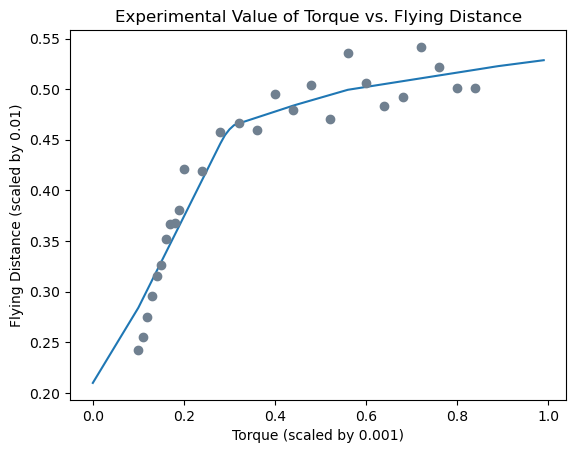

In [11]:
# Training the MLP model
f = TrainMLPR(data_x, data_y)

#Line plot the output of the model 
plot = PlotF(f, xmin=0.0, xmax=1.0, show=False)

# Scatter plot the data samples
plot.plot(data_x, data_y, 'o', c='slategray')

# Show the labels, legends, and the figure
plot.xlabel('Torque (scaled by 0.001)')
plot.ylabel('Flying Distance (scaled by 0.01)')
plot.title('Experimental Value of Torque vs. Flying Distance')
plot.show()

## Control the Robot to Throw the Ball to a Target Location

Similar to section 4.2, we will optimize an objective function (square error function) to find $x_{opt}$ that minimizes the objective function. Moreover, we also created an array of $y_{trg}$ values ranging from $0.24$ to $0.60$ with an interval of $0.02$ ($24$ m to $60$ m with an interval of $2$ m) by implementing *np.arange* function. After that, we create a dictionary where its keys-values contain the measurement variables and a list consisting of measurement values, respectively. Then, we start optimizing for each $y_{trg}$ and record the obtained $x_{opt}$ values to our dictionary. 

In [12]:
def f_error(x, y_trg):
    return np.square(f(x) - y_trg)

y_trgs = np.arange(0.240, 0.620, 0.020)

output = {'ytrgs':y_trgs, 'x_opts':[], 'f_x_opts':[], 'f_error_x_opts':[]}

for y_trg in y_trgs:
    x_opt = FMin(lambda x: f_error(x, y_trg), 0.5, 0.0, 5.0)
    f_x_opt = f(x_opt)
    f_error_x_opt = f_error(x_opt, y_trg)

    output['x_opts'].append(x_opt)
    output['f_x_opts'].append(f_x_opt)
    output['f_error_x_opts'].append(f_error_x_opt)


initial solution x0= [0.5]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 1 (seed=218853, Mon May 15 10:40:14 2023)
Iterat #Fevals   function value    axis ratio  sigma  minstd maxstd min:sec
    1       4 4.457923092237302e-06 1.0e+00 5.82e-01  6e-01  6e-01 0:0.0
    2       8 2.934845132540898e-02 1.0e+00 5.66e-01  5e-01  5e-01 0:0.0
    3      12 5.677781393252215e-04 1.0e+00 3.73e-01  3e-01  3e-01 0:0.0
   67     268 4.656152478624619e-19 1.0e+00 3.18e-06  5e-09  5e-09 0:0.4
termination on tolfun=1e-11 (Mon May 15 10:40:15 2023)
final/bestever f-value = 8.504472e-20 8.504472e-20
mean solution: [0.04017915]
std deviation: [5.04907164e-09]
initial solution x0= [0.5]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 1 (seed=214954, Mon May 15 10:40:15 2023)
Iterat #Fevals   function value    axis ratio  sigma  minstd maxstd min:sec
    1       4 1.209668999122238e-03 1.0e+00 6.20e-01  7e-01  7e-01 0:0.0
    2       8 1.294443981220502e-05 1.0e+00 6.02e-01  6e-01  6e-01 0:0.0


Next, we use the *tabulate* library to print the dictionary created before in the form of a table and plot the estimated values. From the plot, the estimated $x_{opt}$ values for small $y_{trg}$ values are not accurate (underfitting) as their distances to the actual values are considerably large, considering the scale of the data. However, this does not happen to large $y_{trg}$ value since the function does not overfit nor underfit our data. Moreover, we can see that the function is able to predict $x_{opt}$ values outside the range of our $x$ and $y$ data (the line plot is not drawn due to our data range).

|   ytrgs |    x_opts |   f_x_opts |   f_error_x_opts |
|---------|-----------|------------|------------------|
|    0.24 | 0.0406614 |       0.24 |      8.50447e-20 |
|    0.26 | 0.0675719 |       0.26 |      3.40888e-18 |
|    0.28 | 0.0944823 |       0.28 |      6.79811e-20 |
|    0.3  | 0.11765   |       0.3  |      2.2303e-16  |
|    0.32 | 0.139842  |       0.32 |      2.76707e-19 |
|    0.34 | 0.162035  |       0.34 |      2.25002e-16 |
|    0.36 | 0.184228  |       0.36 |      2.57188e-18 |
|    0.38 | 0.206421  |       0.38 |      3.7056e-20  |
|    0.4  | 0.228613  |       0.4  |      1.28247e-20 |
|    0.42 | 0.250806  |       0.42 |      7.287e-21   |
|    0.44 | 0.272999  |       0.44 |      7.08747e-18 |
|    0.46 | 0.299479  |       0.46 |      2.34346e-18 |
|    0.48 | 0.414633  |       0.48 |      4.27054e-18 |
|    0.5  | 0.568767  |       0.5  |      1.17489e-19 |
|    0.52 | 0.85146   |       0.52 |      2.46471e-21 |
|    0.54 | 1.18419   |       0.54 |      3.8927

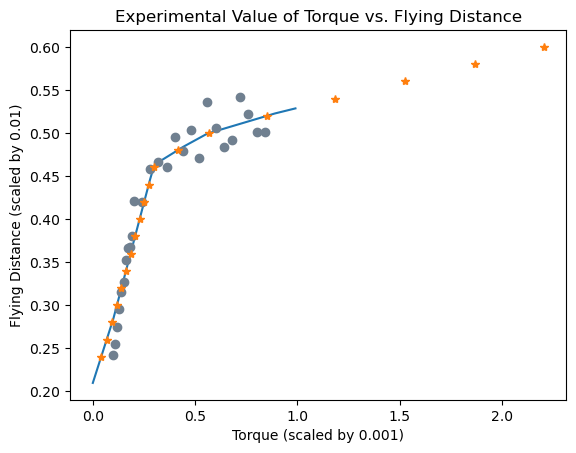

In [13]:
print(tabulate(output, headers='keys', tablefmt='github'))

plot = PlotF(f, xmin=0.0, xmax=1.0, show=False)
plot.plot(data_x, data_y, 'o', c='slategray')
plot.plot(output['x_opts'], output['f_x_opts'], '*')
plot.xlabel('Torque (scaled by 0.001)')
plot.ylabel('Flying Distance (scaled by 0.01)')
plot.title('Experimental Value of Torque vs. Flying Distance')
plot.show()

After that, we multiply the $x_{opt}$ values by $1000$ to obtain the torque values. Then we input these torque values into the robot simulator and record the flying distance using the same command as in previous experiments. In order to ease the comparison, we plot the MLP-estimated results and the true $y$ values. 

From the graph, we can see that for small $y_{trg}$ values, the $x_{opt}$ obtained from the trained-MLP and optimizer yields a really small flying distance value in the actual situation. On the other hand, when the $y_{trg}$ values are large, the $x_{opt}$ values tend to go up linearly while the true value reaches an asymptote value of around $50.11$ m. Overall, the estimated values are not really accurate compared with the real flying distance. 

Next, we calculate the Root Mean Squared Error (RMSE) metric as it is the standard method for deep learning techniques. The result of the RMSE value is considerably high.  Several reasons can cause this high error:

* Limited data. The number of samples used to train the model is very small, considering the extensive range of possible $y$ values. Like the usual deep learning model, a large amount of data is needed in order to properly train the model. The limited number of data also highlights the inability of our MLP model to predict the asymptote trend.

* The model's hyperparameter: activation function, optimizer function, number of layers, number of neurons in each layer, learning rate, momentum, and others.

* The scale number used to scale the data might not be the best one.

Lastly, we can improve the model's performance by addressing the above issues. This can be done by trial and error or using existing algorithms that can improve a model's efficiency and accuracy.

In [14]:
# Rescaling the data to obtain the torque
torque = np.array(output['x_opts']) * 1000 
y_ideal = np.array([10.8489, 18.85292, 22.97134, 26.86658, 31.23996, 35.99181, 41.32508, 44.21941, 46.17176, 
                    46.18808, 44.28088, 46.84426, 47.7033, 52.74706, 50.1126, 50.11637, 50.11638, 50.11226, 50.11239])

print(tabulate(zip(torque, y_ideal, y_trgs * 100), headers=['torque', 'y_ideal', 'y_target'], tablefmt='github'))

|    torque |   y_ideal |   y_target |
|-----------|-----------|------------|
|   40.6614 |   10.8489 |         24 |
|   67.5719 |   18.8529 |         26 |
|   94.4823 |   22.9713 |         28 |
|  117.65   |   26.8666 |         30 |
|  139.842  |   31.24   |         32 |
|  162.035  |   35.9918 |         34 |
|  184.228  |   41.3251 |         36 |
|  206.421  |   44.2194 |         38 |
|  228.613  |   46.1718 |         40 |
|  250.806  |   46.1881 |         42 |
|  272.999  |   44.2809 |         44 |
|  299.479  |   46.8443 |         46 |
|  414.633  |   47.7033 |         48 |
|  568.767  |   52.7471 |         50 |
|  851.46   |   50.1126 |         52 |
| 1184.19   |   50.1164 |         54 |
| 1525.21   |   50.1164 |         56 |
| 1866.23   |   50.1123 |         58 |
| 2203.09   |   50.1124 |         60 |


# Discussion

In order to ease the comparison, we plot the MLP-estimated results and the true $y$ values in the following figure.

From the graph, we can see that for small $y_{trg}$ values, the $x_{opt}$ obtained from the trained-MLP and optimizer yields a really small flying distance value in the actual situation. On the other hand, when the $y_{trg}$ values are large, the $x_{opt}$ values tend to go up linearly while the true value reaches an asymptote value of around $50.11$ m. Overall, the estimated values are not really accurate compared with the real flying distance. 

Next, we calculate the Root Mean Squared Error (RMSE) metric as it is the standard method for deep learning techniques [<a href='https://machinelearningmastery.com/regression-metrics-for-machine-learning/'>7</a>]. The result of the RMSE value is considerably high.  Several reasons can cause this high error:

* Limited data. The number of samples used to train the model is very small, considering the extensive range of possible $y$ values. Like the usual deep learning model, a large amount of data is needed in order to properly train the model. The limited number of data also highlights the inability of our MLP model to predict the asymptote trend.

* The model's hyperparameter: activation function, optimizer function, number of layers, number of neurons in each layer, learning rate, momentum, and others.

* The scale number used to scale the data might not be the best one.

* Others

Lastly, we can improve the model's performance by addressing the above issues. This can be done by trial and error or using existing algorithms that can improve a model's efficiency and accuracy.

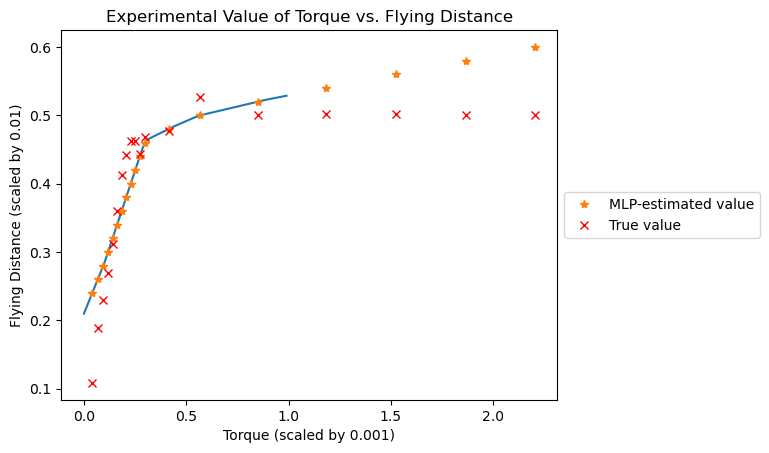

In [15]:
# Plot to make comparison easier
plot = PlotF(f, xmin=0.0, xmax=1.0, show=False)
plot.plot(output['x_opts'], output['f_x_opts'], '*', label='MLP-estimated value')
plot.plot(output['x_opts'], y_ideal * 0.01, 'x', c='r', label='True value')
plot.xlabel('Torque (scaled by 0.001)')
plot.ylabel('Flying Distance (scaled by 0.01)')
plot.title('Experimental Value of Torque vs. Flying Distance')
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot.show()

In [16]:
RMSE = np.sqrt(np.mean((y_ideal - y_trgs * 100) ** 2))
print(f'Root Mean Square Error: {RMSE}')

Root Mean Square Error: 5.656948331877966


# Conclusion

In this experiment, we learned how to utilize machine learning to control the robot's arm behaviour. We also discussed machine learning terms like the multi-layer perceptron model, regression, and optimization function. We train the model by creating a dataset consisting of a control parameter (torque) and the dependent variable (flying distance). After training the model, we evaluate the model's performance by observing the generated plot. Moreover, we also utilized the CMA-es algorithm to optimize an objective function, which allows us to obtain a torque value by inputting the desired flying distance to the objective function. However, the result is considered inaccurate, and several hypotheses were proposed that might explain the bad result.

# Reference

[1] Machine Learning for Robot Control (Lab Experiment II) — Machine Learning for Robot Control (Lab Experiment II). http://www.ic.is.tohoku.ac.jp/%7Eswk/lecture/exp2/

[2] Zhang, A. (2022). Dive into Deep Learning: 5. Multilayer Perceptrons. https://d2l.ai/chapter_multilayer-perceptrons/index.html

[3] Hansen, N. (2016). The CMA evolution strategy: A tutorial. https://doi.org/10.48550/arXiv.1604.00772.

[4] Wikipedia contributors. (2022, November 22). CMA-ES. Wikipedia. https://en.wikipedia.org/wiki/CMA-ES

[5] NumPy documentation — NumPy v1.23 Manual. (n.d.). https://numpy.org/doc/stable/

[6] tabulate. (2022, October 6). PyPI. https://pypi.org/project/tabulate/

[7] Brownlee, J. (2021, January 2021). Regression Metrics for Machine Learning. https://machinelearningmastery.com/regression-metrics-for-machine-learning/

# Addition
This part is only a little exploration that I did on how to utilize all available parameters (torque, initial angle, target angle) by implementing the cma package. In my opinion, adding some features to the contol parameters allow the model to learn more appropiately, resulting a better accuracy. Moreover, I also utilized more samples in this exploration as there are greater number of possible combinations compared to the case where we only tweak one independent variables.

In [17]:
# Importing necessary packages
from sklearn.neural_network import MLPRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
sys.path.pop(-1)
# We download and install cma package from the internet as I have tried using cma.py module in 'ai_ctrl_1' 
# directory and it is not working for >=1 dimension parameter.
! pip install cma
import imp
imp.reload(cma)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 579.2 kB/s eta 0:00:0000:0100:01


/tmp/ipykernel_10651/2512251052.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'cma' from '/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/__init__.py'>

In [19]:
# Importing the data. The file 'Data.xlsx' is located in my local directory
df = pd.read_excel('Data.xlsx', index_col=None, header=0)
print(df.head())
df.shape

   Initial Angle  Final Angle  Torque  First Landing Position
0             30           80     100                11.01115
1             30           80     110                11.54333
2             30           80     120                12.13412
3             30           80     130                12.48524
4             30           80     140                12.06657


(196, 4)

In [20]:
# We scale the dataset then split it into two: training and test dataset
x = np.array([df.iloc[i, :3] for i in range(df.shape[0])]) * 0.001
print(f'x: {x}, {x.shape}')
y = np.array(df.iloc[:, 3]) * 0.01
print(f'y: {y}, {y.shape}')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=1234)

x: [[0.03 0.08 0.1 ]
 [0.03 0.08 0.11]
 [0.03 0.08 0.12]
 [0.03 0.08 0.13]
 [0.03 0.08 0.14]
 [0.03 0.08 0.15]
 [0.03 0.08 0.16]
 [0.03 0.08 0.17]
 [0.03 0.08 0.18]
 [0.03 0.08 0.19]
 [0.03 0.08 0.2 ]
 [0.03 0.09 0.1 ]
 [0.03 0.09 0.11]
 [0.03 0.09 0.12]
 [0.03 0.09 0.13]
 [0.03 0.09 0.14]
 [0.03 0.09 0.15]
 [0.03 0.09 0.16]
 [0.03 0.09 0.17]
 [0.03 0.09 0.18]
 [0.03 0.09 0.19]
 [0.03 0.09 0.2 ]
 [0.03 0.1  0.1 ]
 [0.03 0.1  0.11]
 [0.03 0.1  0.12]
 [0.03 0.1  0.13]
 [0.03 0.1  0.14]
 [0.03 0.1  0.15]
 [0.03 0.1  0.16]
 [0.03 0.1  0.17]
 [0.03 0.1  0.18]
 [0.03 0.1  0.19]
 [0.03 0.1  0.2 ]
 [0.03 0.11 0.1 ]
 [0.03 0.11 0.11]
 [0.03 0.11 0.12]
 [0.03 0.11 0.13]
 [0.03 0.11 0.14]
 [0.03 0.11 0.15]
 [0.03 0.11 0.16]
 [0.03 0.11 0.17]
 [0.03 0.11 0.18]
 [0.03 0.11 0.19]
 [0.03 0.11 0.2 ]
 [0.03 0.12 0.1 ]
 [0.03 0.12 0.11]
 [0.03 0.12 0.12]
 [0.03 0.12 0.13]
 [0.03 0.12 0.14]
 [0.03 0.12 0.15]
 [0.03 0.12 0.16]
 [0.03 0.12 0.17]
 [0.03 0.12 0.18]
 [0.03 0.12 0.19]
 [0.03 0.12 0.2 ]
 [0.02 

In [21]:
# We train the model. The model's hyperparamters is the same as the one used in TrainMLPR
model = MLPRegressor(activation='relu', hidden_layer_sizes=(20, 20), solver='adam', tol=1e-6, alpha=0.01, max_iter=200000, random_state=2)
model.fit(X_train, y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(20, 20), max_iter=200000,
             random_state=2, tol=1e-06)

In [22]:
# Defining the objective function
def f_error(x, y_trg):
    return np.square(model.predict(x) - y_trg)

In [23]:
# The CMA-es algorithm to optimize the objective function. It is similar as FMin in previous exercise, 
# but it accepts multi-dimensional input
def FMin(f, x_init, x_min, x_max):
  options= {'bounds':[x_min, x_max], 'verb_log':0,'popsize':4}
  res = cma.fmin(lambda x:f(x), x_init, 0.01, options)
  return res

In [24]:
# Start optimizing the objective function and obtain x_opt for each test y value.
x_init = np.array([0.03, 0.1, 0.15])
x_min = np.array([0.02, 0.08, 0.1])
x_max = np.array([0.04, 0.12, 0.2])
x_opts = [FMin(lambda x: f_error(x.reshape(1, -1), y_trg), x_init, x_min, x_max)[0] for y_trg in y_test]

(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 3 (seed=224684, Mon May 15 10:40:30 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      4 5.008148813271706e-05 1.0e+00 7.33e-03  5e-03  7e-03 0:00.0
    2      8 2.619957393271779e-05 1.1e+00 6.64e-03  4e-03  7e-03 0:00.0
    3     12 2.656691301804338e-05 1.1e+00 4.78e-03  3e-03  5e-03 0:00.0


/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/evolution_strategy.py:1901: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.006666666666666666
  warnings.warn("Sampling standard deviation i={} at iteration {}"
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.00609043] with non-scalar type <class 'numpy.ndarray'>.
                        Using now ``[v[0] for v in function_values]`` instead (further warnings are suppressed) ()
  warnings.warn(msg + ' (' +
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [3.06154681e-05] with non-scalar type <class 'numpy.ndarray'>.
             

   95    380 4.463489803281071e-17 9.7e+01 6.37e-07  6e-08  3e-07 0:00.3
termination on tolfun=1e-11 (Mon May 15 10:40:30 2023)
final/bestever f-value = 7.316681e-17 8.547921e-19 after 381/341 evaluations
incumbent solution: [0.027157544902897672, 0.10103169754429156, 0.15848304599078228]
std deviation: [2.517515219129346e-07, 5.737381071092003e-08, 2.844018064659509e-07]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 3 (seed=243959, Mon May 15 10:40:30 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      4 6.425399441953463e-03 1.0e+00 9.80e-03  7e-03  1e-02 0:00.0
    2      8 3.950105591825926e-03 1.2e+00 9.94e-03  7e-03  1e-02 0:00.0
    3     12 3.471529750220991e-03 1.3e+00 8.43e-03  5e-03  8e-03 0:00.0


/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/evolution_strategy.py:1901: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.006666666666666666
  warnings.warn("Sampling standard deviation i={} at iteration {}"
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.00712677] with non-scalar type <class 'numpy.ndarray'>.
                        Using now ``[v[0] for v in function_values]`` instead (further warnings are suppressed) ()
  warnings.warn(msg + ' (' +
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.00395011] with non-scalar type <class 'numpy.ndarray'>.
                 

  100    400 4.845337548458478e-15 2.1e+01 3.03e-05  8e-07  3e-06 0:00.2
  111    444 7.171791299873339e-16 3.7e+01 1.67e-05  4e-07  2e-06 0:00.2
termination on tolfun=1e-11 (Mon May 15 10:40:30 2023)
final/bestever f-value = 1.722081e-16 1.034048e-18 after 445/439 evaluations
incumbent solution: [0.0317244996286449, 0.11975697981084818, 0.19210630293759978]
std deviation: [3.9282922564109367e-07, 9.768147092283408e-07, 1.7333655493973816e-06]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 3 (seed=220953, Mon May 15 10:40:30 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      4 9.202383732938706e-06 1.0e+00 1.29e-02  7e-03  1e-02 0:00.0
    2      8 2.442560130515411e-06 1.1e+00 1.07e-02  6e-03  1e-02 0:00.0
    3     12 6.111169714612497e-04 1.2e+00 1.05e-02  5e-03  1e-02 0:00.0


/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/evolution_strategy.py:1901: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.006666666666666666
  warnings.warn("Sampling standard deviation i={} at iteration {}"
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [9.20238373e-06] with non-scalar type <class 'numpy.ndarray'>.
                        Using now ``[v[0] for v in function_values]`` instead (further warnings are suppressed) ()
  warnings.warn(msg + ' (' +
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.00400041] with non-scalar type <class 'numpy.ndarray'>.
             

  100    400 2.915159236445138e-09 6.1e+01 6.46e-04  2e-04  5e-04 0:00.2
  153    612 9.810064923724996e-17 4.1e+02 4.32e-06  7e-07  2e-06 0:00.3
termination on tolfun=1e-11 (Mon May 15 10:40:31 2023)
final/bestever f-value = 1.395579e-16 6.561067e-18 after 613/591 evaluations
incumbent solution: [0.028408942989303042, 0.09838988750071637, 0.13630135430326457]
std deviation: [1.0907221068553022e-06, 7.236328190343357e-07, 1.976275709133327e-06]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 3 (seed=243688, Mon May 15 10:40:31 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      4 1.558392284467131e-03 1.0e+00 1.15e-02  7e-03  1e-02 0:00.0
    2      8 2.083543606571861e-04 1.3e+00 1.32e-02  7e-03  1e-02 0:00.0
    3     12 7.340933537031372e-05 1.5e+00 1.41e-02  7e-03  1e-02 0:00.0


/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/evolution_strategy.py:1901: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.006666666666666666
  warnings.warn("Sampling standard deviation i={} at iteration {}"
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.00356629] with non-scalar type <class 'numpy.ndarray'>.
                        Using now ``[v[0] for v in function_values]`` instead (further warnings are suppressed) ()
  warnings.warn(msg + ' (' +
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.00170313] with non-scalar type <class 'numpy.ndarray'>.
                 

  100    400 5.861604738550443e-15 5.0e+01 4.30e-05  6e-06  1e-05 0:00.3
  115    460 1.046282705438479e-18 1.1e+02 1.45e-05  2e-06  5e-06 0:00.3
termination on tolfun=1e-11 (Mon May 15 10:40:31 2023)
final/bestever f-value = 3.502680e-16 1.046283e-18 after 461/460 evaluations
incumbent solution: [0.022260474684497537, 0.11949355840004625, 0.16724626354391692]
std deviation: [4.652855877140143e-06, 3.965410428262622e-06, 2.3942567143863406e-06]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 3 (seed=243184, Mon May 15 10:40:31 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      4 4.609739140617461e-03 1.0e+00 9.40e-03  6e-03  1e-02 0:00.0
    2      8 8.611632109073153e-04 1.2e+00 1.28e-02  7e-03  1e-02 0:00.0
    3     12 3.894206752569799e-05 1.5e+00 2.51e-02  7e-03  3e-02 0:00.0


/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/evolution_strategy.py:1901: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.006666666666666666
  warnings.warn("Sampling standard deviation i={} at iteration {}"
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.01270009] with non-scalar type <class 'numpy.ndarray'>.
                        Using now ``[v[0] for v in function_values]`` instead (further warnings are suppressed) ()
  warnings.warn(msg + ' (' +
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.00606429] with non-scalar type <class 'numpy.ndarray'>.
                 

  100    400 6.039069262236651e-15 7.0e+01 9.95e-05  1e-05  5e-05 0:00.2
  119    476 9.484638188027564e-16 9.4e+01 2.06e-05  2e-06  6e-06 0:00.2
termination on tolfun=1e-11 (Mon May 15 10:40:32 2023)
final/bestever f-value = 2.480379e-16 3.946087e-19 after 477/407 evaluations
incumbent solution: [0.03892659342665215, 0.11916749919253503, 0.19383261755877854]
std deviation: [2.2442968259912967e-06, 2.2458431205848236e-06, 5.676567954330399e-06]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 3 (seed=150478, Mon May 15 10:40:32 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      4 6.994238608166235e-04 1.0e+00 9.85e-03  6e-03  1e-02 0:00.0
    2      8 3.283832060705492e-05 1.2e+00 1.00e-02  6e-03  1e-02 0:00.0
    3     12 1.531202116601587e-04 1.3e+00 9.17e-03  6e-03  1e-02 0:00.0


/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/evolution_strategy.py:1901: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.006666666666666666
  warnings.warn("Sampling standard deviation i={} at iteration {}"
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.01419014] with non-scalar type <class 'numpy.ndarray'>.
                        Using now ``[v[0] for v in function_values]`` instead (further warnings are suppressed) ()
  warnings.warn(msg + ' (' +
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [5.82415004e-05] with non-scalar type <class 'numpy.ndarray'>.
             

  100    400 1.369619271875191e-15 9.3e+01 3.87e-06  5e-07  3e-06 0:00.2
  103    412 1.642342260328315e-17 1.2e+02 4.00e-06  6e-07  3e-06 0:00.2
termination on tolfun=1e-11 (Mon May 15 10:40:32 2023)
final/bestever f-value = 6.704368e-17 2.323759e-21 after 413/404 evaluations
incumbent solution: [0.0394488305302837, 0.08829767630912896, 0.11486109911997963]
std deviation: [9.11382804185042e-07, 5.824178745490907e-07, 3.130520424277159e-06]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 3 (seed=242118, Mon May 15 10:40:32 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      4 2.249570354651279e-03 1.0e+00 7.86e-03  5e-03  8e-03 0:00.0
    2      8 2.106727527242935e-04 1.1e+00 8.33e-03  5e-03  8e-03 0:00.0
    3     12 5.382044667429767e-07 1.1e+00 8.80e-03  6e-03  8e-03 0:00.0


/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/evolution_strategy.py:1901: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.006666666666666666
  warnings.warn("Sampling standard deviation i={} at iteration {}"
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.00224957] with non-scalar type <class 'numpy.ndarray'>.
                        Using now ``[v[0] for v in function_values]`` instead (further warnings are suppressed) ()
  warnings.warn(msg + ' (' +
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.00021067] with non-scalar type <class 'numpy.ndarray'>.
                 

  100    400 1.911942072188886e-13 3.0e+01 3.28e-05  3e-06  1e-05 0:00.2
  112    448 1.204812525244790e-14 8.3e+01 3.32e-05  4e-06  2e-05 0:00.2
termination on tolfun=1e-11 (Mon May 15 10:40:32 2023)
final/bestever f-value = 8.312494e-16 6.763351e-16 after 449/414 evaluations
incumbent solution: [0.036514405779458005, 0.11999612932265125, 0.1263973711591579]
std deviation: [1.7015107971778656e-05, 9.430683246684598e-06, 3.856527389233378e-06]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 3 (seed=267024, Mon May 15 10:40:32 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      4 2.645457723194239e-03 1.0e+00 8.18e-03  5e-03  8e-03 0:00.0
    2      8 5.512716446817819e-04 1.0e+00 9.67e-03  6e-03  1e-02 0:00.0
    3     12 2.064331462213020e-05 1.2e+00 1.08e-02  7e-03  1e-02 0:00.0


/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/evolution_strategy.py:1901: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.006666666666666666
  warnings.warn("Sampling standard deviation i={} at iteration {}"
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.01659598] with non-scalar type <class 'numpy.ndarray'>.
                        Using now ``[v[0] for v in function_values]`` instead (further warnings are suppressed) ()
  warnings.warn(msg + ' (' +
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.00055127] with non-scalar type <class 'numpy.ndarray'>.
                 

  100    400 1.377568252405957e-15 3.7e+02 3.29e-05  1e-05  8e-05 0:00.2
  120    480 8.809006148201121e-16 5.6e+02 4.14e-06  1e-06  6e-06 0:00.2
termination on tolfun=1e-11 (Mon May 15 10:40:33 2023)
final/bestever f-value = 9.470825e-16 1.335282e-18 after 481/409 evaluations
incumbent solution: [0.02241327118614184, 0.08733223946786667, 0.12329964470654076]
std deviation: [1.0193587726322376e-06, 1.2915829753726486e-06, 5.646461078444455e-06]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 3 (seed=191110, Mon May 15 10:40:33 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      4 4.195870671636343e-02 1.0e+00 1.06e-02  7e-03  1e-02 0:00.0
    2      8 3.098674110842275e-02 1.3e+00 1.60e-02  7e-03  2e-02 0:00.0
    3     12 2.697412472540151e-02 1.3e+00 2.38e-02  7e-03  2e-02 0:00.0


/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/evolution_strategy.py:1901: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.006666666666666666
  warnings.warn("Sampling standard deviation i={} at iteration {}"
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.06420376] with non-scalar type <class 'numpy.ndarray'>.
                        Using now ``[v[0] for v in function_values]`` instead (further warnings are suppressed) ()
  warnings.warn(msg + ' (' +
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.04895255] with non-scalar type <class 'numpy.ndarray'>.
                 

  100    400 1.474009047422266e-02 4.1e+00 2.14e-06  4e-08  2e-07 0:00.2
  115    460 1.474009047416744e-02 4.4e+00 4.77e-07  6e-09  3e-08 0:00.2
termination on tolfun=1e-11 (Mon May 15 10:40:33 2023)
final/bestever f-value = 1.474009e-02 1.474009e-02 after 461/437 evaluations
incumbent solution: [0.020000000000007068, 0.11999999999999768, 0.199999999999997]
std deviation: [1.2265687836262907e-08, 6.443912489098392e-09, 2.7542723212846897e-08]
(2_w,4mirr1)-aCMA-ES (mu_w=1.5,w_1=80%) in dimension 3 (seed=234668, Mon May 15 10:40:33 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      4 2.482063199737192e-06 1.0e+00 8.18e-03  5e-03  8e-03 0:00.0
    2      8 3.141965097785491e-04 1.1e+00 5.76e-03  4e-03  5e-03 0:00.0
    3     12 8.580954013464404e-06 1.1e+00 5.84e-03  4e-03  5e-03 0:00.0


/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/evolution_strategy.py:1901: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.6666666666666666 to stds[0]=0.006666666666666666
  warnings.warn("Sampling standard deviation i={} at iteration {}"
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [2.4820632e-06] with non-scalar type <class 'numpy.ndarray'>.
                        Using now ``[v[0] for v in function_values]`` instead (further warnings are suppressed) ()
  warnings.warn(msg + ' (' +
/home/farrosalferro/miniconda3/envs/PythonEngineer/lib/python3.9/site-packages/cma/utilities/utils.py:343: UserWarning: function_values is not a list of scalars,
                        the first element equals [0.0006585] with non-scalar type <class 'numpy.ndarray'>.
               

  100    400 5.779666484766622e-14 6.9e+01 9.34e-05  3e-05  7e-05 0:00.2
  125    500 2.260061958927776e-13 3.9e+02 5.96e-05  3e-05  5e-05 0:00.3
termination on tolfun=1e-11 (Mon May 15 10:40:33 2023)
final/bestever f-value = 2.298665e-13 5.520978e-17 after 501/433 evaluations
incumbent solution: [0.020771759157005038, 0.09283834923512274, 0.15193731947476768]
std deviation: [3.591792105930325e-05, 2.6872399941026223e-05, 5.103964937688199e-05]


In [25]:
# Defining Root Mean Square Error function between the prediction and the true value.
def RMSE(y_predict, y_real):
  return np.sqrt(np.sum(np.square(y_predict - y_real)))

In [26]:
# Print the error
error = RMSE(model.predict(x_opts), y_test.reshape(-1,1))
print(f'RMSE error: {error}')

RMSE error: 1.3417644158501918


As we can see, the error reduces from $5.65$ to $1.34$, which is quite significant. We can further improve the model's performance as already explained in the Discussion section.